### Jupyter notebook about retail stocks performance in Brazilian market!

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Ativos do varejo do mercado brasileiro

In [2]:
## main bank stocks ##
ativos = ['BBAS3','ITUB4','BPAC11','SANB11','BBDC4']

In [3]:
ativos = [i + '.SA' for i in ativos]

In [4]:
inicio = '2020-02-01'
#fim = '2023-08-17'
yesterday =  datetime.date.today() - datetime.timedelta(days=1)
yest= yesterday.strftime('%Y-%m-%d')
yest

'2024-06-12'

In [5]:
df = yf.download(ativos, start = inicio, end = yest)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [6]:
df.tail()

,BBAS3.SA,BBDC4.SA,BPAC11.SA,ITUB4.SA,SANB11.SA
Date,,,,,
2024-06-05,26.835716,12.78,32.490002,31.500000,26.820000
2024-06-06,27.189722,13.05,33.299999,31.900000,27.610001
2024-06-07,26.727547,12.95,32.680000,31.450001,27.280001
2024-06-10,26.757046,12.86,31.600000,31.200001,27.000000
2024-06-11,27.052053,12.93,32.230000,31.549999,27.090000


#### normalizando os ativos


In [7]:
normalizado = df/df.iloc[0]

<Axes: xlabel='Date'>

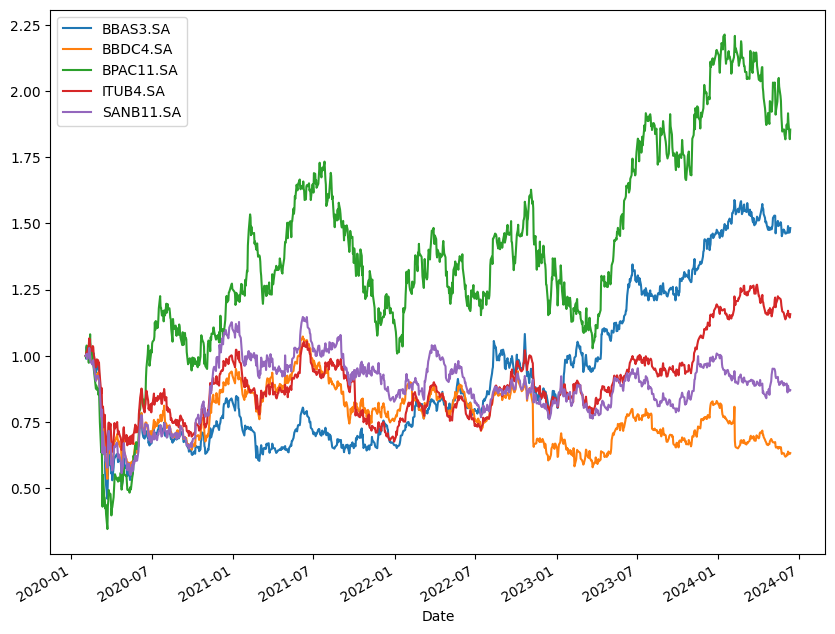

In [8]:
normalizado.plot(figsize = (10,8))

### Preços no dia do aporte

In [9]:
primeiro = df.iloc[0]

In [10]:
primeiro

BBAS3.SA     18.246326
BBDC4.SA     20.434469
BPAC11.SA    17.379707
ITUB4.SA     27.257759
SANB11.SA    31.119377
Name: 2020-02-03 00:00:00, dtype: float64

In [11]:
#qntd=[100,100,100,500,300,1000,4000]
#res_list = []
#for i in range(0, len(primeiro)):
#    res_list.append(primeiro[i] * qntd[i])
    

In [12]:
comprados = 10000/primeiro

In [13]:
comprados

BBAS3.SA     548.055524
BBDC4.SA     489.369207
BPAC11.SA    575.383682
ITUB4.SA     366.868016
SANB11.SA    321.343193
Name: 2020-02-03 00:00:00, dtype: float64

In [14]:
# Número de papéis arredondados
round(comprados, 0)

BBAS3.SA     548.0
BBDC4.SA     489.0
BPAC11.SA    575.0
ITUB4.SA     367.0
SANB11.SA    321.0
Name: 2020-02-03 00:00:00, dtype: float64

In [15]:
comprados = round(comprados, 0)

In [16]:
comprados

BBAS3.SA     548.0
BBDC4.SA     489.0
BPAC11.SA    575.0
ITUB4.SA     367.0
SANB11.SA    321.0
Name: 2020-02-03 00:00:00, dtype: float64

## 7.4. Construção da carteira e da comparação com o IBOV

Como saber qual era o valor que tínhamos em cada papel, por dia? Basta multiplicar o número de papéis que compramos com os preços diários

In [17]:
PL = df*comprados
#PL=df*qntd

In [18]:
PL.head()

,BBAS3.SA,BBDC4.SA,BPAC11.SA,ITUB4.SA,SANB11.SA
Date,,,,,
2020-02-03,9998.986893,9992.455450,9993.331718,10003.597588,9989.320061
2020-02-04,9890.344948,9998.187784,9928.456020,10082.651043,9979.827599
2020-02-05,10331.059708,10191.508095,10382.578230,10143.467478,10062.894602
2020-02-06,10156.823494,10073.703312,10328.297997,10119.134884,9908.624336
2020-02-07,10167.071945,10188.486168,10198.546600,10249.878214,9873.027603


In [19]:
PL.tail()

,BBAS3.SA,BBDC4.SA,BPAC11.SA,ITUB4.SA,SANB11.SA
Date,,,,,
2024-06-05,14705.972504,6249.419869,18681.750965,11560.50000,8609.219902
2024-06-06,14899.967690,6381.450093,19147.499561,11707.29986,8862.810196
2024-06-07,14646.695587,6332.549907,18791.000175,11542.15028,8756.880220
2024-06-10,14662.861069,6288.539832,18170.000219,11450.40028,8667.000000
2024-06-11,14824.525291,6322.770149,18532.249737,11578.84972,8695.890049


In [20]:
# Criando uma nova coluna que vai demonstrar o valor total da nossa carteira, por dia
PL['PL Total'] = PL.sum(axis = 1)

In [21]:
#PL.head()
PL.tail()

,BBAS3.SA,BBDC4.SA,BPAC11.SA,ITUB4.SA,SANB11.SA,PL Total
Date,,,,,,
2024-06-05,14705.972504,6249.419869,18681.750965,11560.50000,8609.219902,59806.863240
2024-06-06,14899.967690,6381.450093,19147.499561,11707.29986,8862.810196,60999.027400
2024-06-07,14646.695587,6332.549907,18791.000175,11542.15028,8756.880220,60069.276170
2024-06-10,14662.861069,6288.539832,18170.000219,11450.40028,8667.000000,59238.801400
2024-06-11,14824.525291,6322.770149,18532.249737,11578.84972,8695.890049,59954.284946


In [22]:
ibov = yf.download('^BVSP', start = inicio, end = yest)

[*********************100%***********************]  1 of 1 completed


In [23]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-03,113761.0,115299.0,113467.0,114629.0,114629.0,5512200
2020-02-04,114631.0,116556.0,114631.0,115557.0,115557.0,5829400
2020-02-05,115563.0,117701.0,115562.0,116028.0,116028.0,7173800
2020-02-06,116033.0,117382.0,114723.0,115190.0,115190.0,7382400
2020-02-07,115190.0,115190.0,113769.0,113770.0,113770.0,6594100


In [24]:
ibov.rename(columns = {'Close':'Ibov'}, inplace = True)

In [25]:
ibov = ibov[['Ibov']]

In [26]:
ibov

,Ibov
Date,
2020-02-03,114629.0
2020-02-04,115557.0
2020-02-05,116028.0
2020-02-06,115190.0
2020-02-07,113770.0
...,...
2024-06-05,121407.0
2024-06-06,122899.0
2024-06-07,120767.0


Agora vamos juntar os dados das tabelas do IBOV e da nossa carteira

In [27]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [28]:
novo_df.head()

,Ibov,BBAS3.SA,BBDC4.SA,BPAC11.SA,ITUB4.SA,SANB11.SA,PL Total
Date,,,,,,,
2020-02-03,114629.0,9998.986893,9992.455450,9993.331718,10003.597588,9989.320061,49977.691710
2020-02-04,115557.0,9890.344948,9998.187784,9928.456020,10082.651043,9979.827599,49879.467394
2020-02-05,116028.0,10331.059708,10191.508095,10382.578230,10143.467478,10062.894602,51111.508112
2020-02-06,115190.0,10156.823494,10073.703312,10328.297997,10119.134884,9908.624336,50586.584023
2020-02-07,113770.0,10167.071945,10188.486168,10198.546600,10249.878214,9873.027603,50677.010530


<Axes: xlabel='Date'>

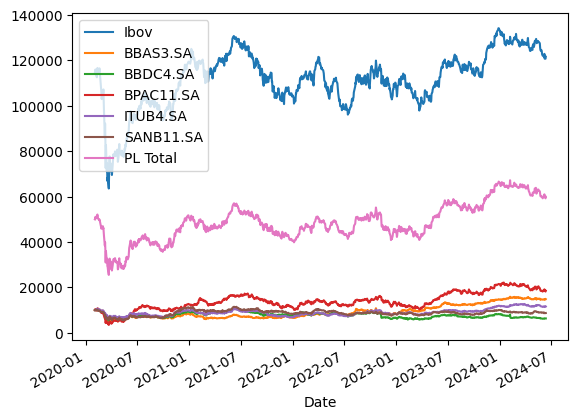

In [29]:
novo_df.plot()

In [30]:
novo_normalizado = (novo_df/novo_df.iloc[0])*100

In [31]:
novo_normalizado

,Ibov,BBAS3.SA,BBDC4.SA,BPAC11.SA,ITUB4.SA,SANB11.SA,PL Total
Date,,,,,,,
2020-02-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-02-04,100.809568,98.913470,100.057367,99.350810,100.790250,99.904974,99.803464
2020-02-05,101.220459,103.321065,101.992029,103.895062,101.398196,100.736532,102.268645
2020-02-06,100.489405,101.578526,100.813092,103.351898,101.154957,99.192180,101.218328
2020-02-07,99.250626,101.681021,101.961787,102.053518,102.461921,98.835832,101.399262
...,...,...,...,...,...,...,...
2024-06-05,105.912989,147.074625,62.541383,186.942168,115.563425,86.184243,119.667118
2024-06-06,107.214579,149.014774,63.862682,191.602762,117.030896,88.722857,122.052510
2024-06-07,105.354666,146.481796,63.373311,188.035389,115.379994,87.662425,120.192178


<Axes: xlabel='Date'>

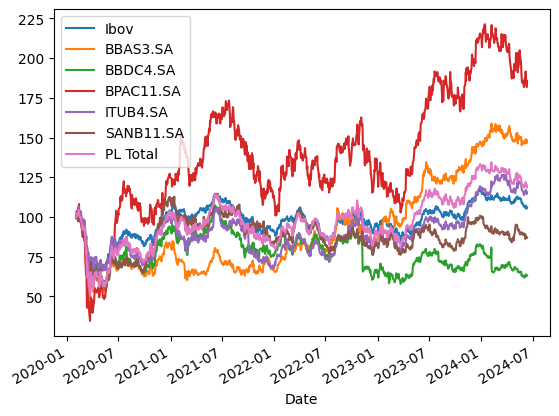

In [32]:
novo_normalizado.plot()

<Axes: >

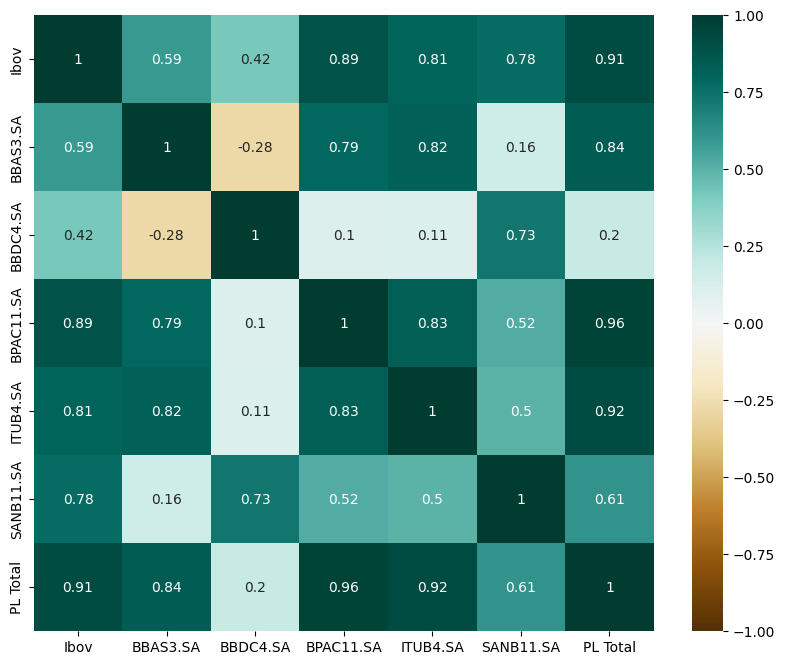

In [33]:
plt.figure(figsize = (10,8))

sns.heatmap(novo_normalizado.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

<Axes: xlabel='Date'>

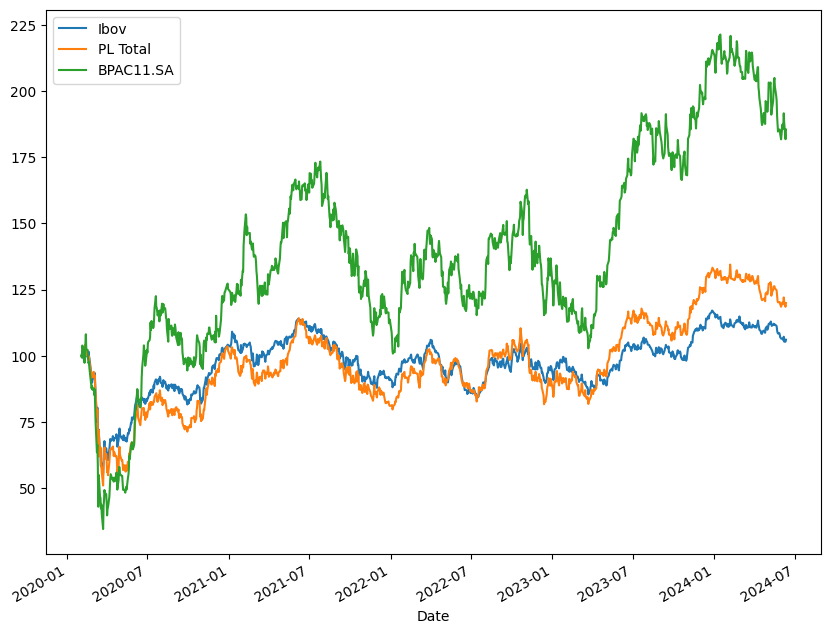

In [34]:
novo_normalizado[['Ibov','PL Total','BPAC11.SA']].plot(figsize = (10,8))

E se o usuário conseguisse determinar quanto ele investiria em cada ativo?

In [35]:
#bank ativos
ativos

['BBAS3.SA', 'ITUB4.SA', 'BPAC11.SA', 'SANB11.SA', 'BBDC4.SA']